In [6]:
!pip install opencv-python

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import PIL
import cv2
import numpy as np

<h1>Flower Dataset</h1>


In [8]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

cache_dir indicates where to download data. I specified . which means current directory.<br>
untar true will unzip it

In [9]:
data_dir

'.\\datasets\\flower_photos'

In [10]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [11]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [13]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

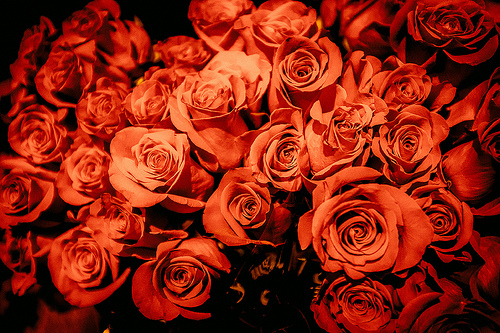

In [14]:
PIL.Image.open(str(roses[2]))

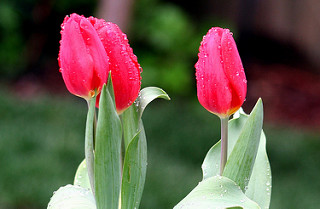

In [15]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [16]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [17]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [18]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.3720 - loss: 1.5108
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.6109 - loss: 1.0085
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.7003 - loss: 0.7979
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.7945 - loss: 0.5869
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.8694 - loss: 0.3676
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 148ms/step - accuracy: 0.9254 - loss: 0.2275
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - accuracy: 0.9701 - loss: 0.1172
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.9815 - loss: 0.0707
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.9826 - loss: 0.0682
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - accuracy: 0.9917 - loss: 0.0358
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.9987 - loss: 0.0136
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13

In [26]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6585 - loss: 2.5853


[2.5650672912597656, 0.6546840667724609]

In [27]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


array([[  9.335667  ,  18.916353  ,  -3.7847443 , -24.984438  ,
          1.8300999 ],
       [ 10.67716   ,   1.524189  ,  -8.698068  ,  -6.4163995 ,
          6.0711246 ],
       [ -3.2673802 ,   5.9492865 ,  19.308943  ,  -8.785118  ,
         -0.27403006],
       ...,
       [  6.534425  ,  -3.2708068 ,  -8.037882  ,   8.7929945 ,
          9.57231   ],
       [  1.1797345 ,   3.552281  ,   3.9506593 ,  -3.8422232 ,
         -2.968464  ],
       [  7.7063775 ,  -9.992856  ,   3.70709   ,  13.669868  ,
          9.781824  ]], dtype=float32)

In [28]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.9044749e-05, 9.9993086e-01, 1.3835938e-10, 8.5920872e-20,
       3.7975553e-08], dtype=float32)>

In [29]:
np.argmax(score)

1

In [30]:
y_test[0]

1

In [31]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

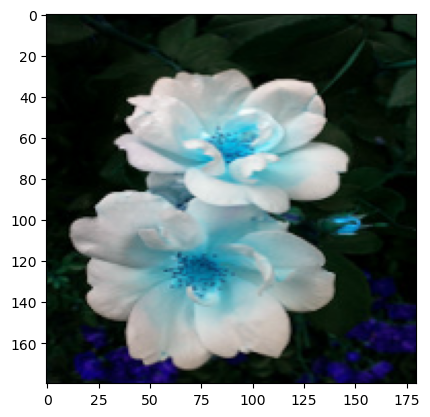

In [33]:
plt.imshow(X[0])

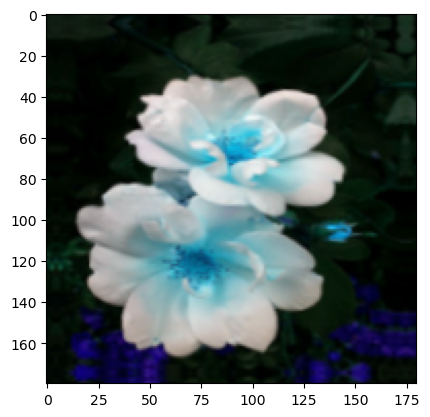

In [44]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [45]:
num_classes = 5

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - accuracy: 0.3852 - loss: 1.4050
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 192ms/step - accuracy: 0.5801 - loss: 1.0698
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 192ms/step - accuracy: 0.6078 - loss: 0.9801
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.6372 - loss: 0.9198
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - accuracy: 0.6759 - loss: 0.8309
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.6942 - loss: 0.7886
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.7188 - loss: 0.7041
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.7339 - loss: 0.6903
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.7395 - loss: 0.6632
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 205ms/step - accuracy: 0.7614 - loss: 0.6298
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - accuracy: 0.7673 - loss: 0.6087
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18

In [46]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6927 - loss: 1.2574


[1.126916527748108, 0.6993464231491089]